# Optical Character Recognition on Ukrainian Dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/uaset.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


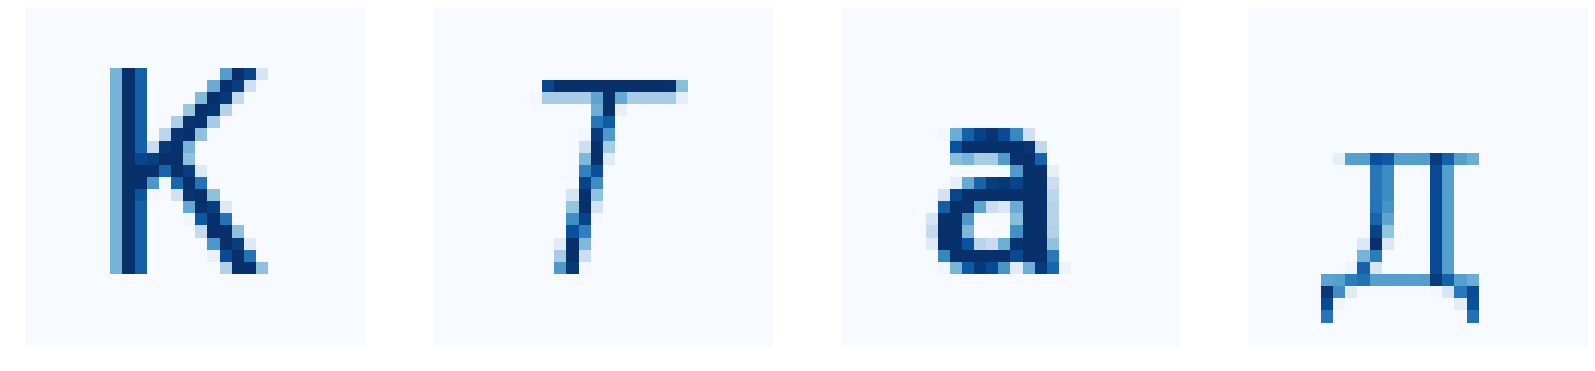

In [3]:
cols = 4

pylab.rcParams['figure.figsize'] = 28, 28
fig = plt.figure()

for i in range(cols):
    k = np.random.randint(0, len(df))
    ax = fig.add_subplot(1,cols,i + 1)
    ax.set_axis_off()
    ax.imshow(df.iloc[k][1:].reshape([28, 28]), cmap='Blues', interpolation='None')

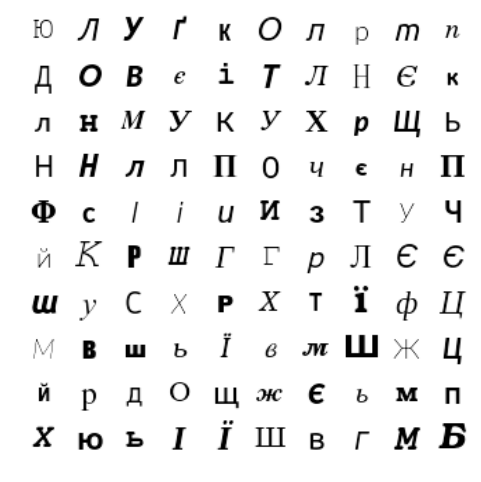

In [4]:
rows = 10
cols = 10

pylab.rcParams['figure.figsize'] = 8, 8 
fig = plt.figure()

for i in range(rows):
    for j in range(cols):
        k = np.random.randint(0, len(df))
        
        ax = fig.add_subplot(rows,cols,i*cols + j + 1) 
        ax.set_axis_off()
        ax.imshow(df.iloc[k][1:].reshape([28, 28]), cmap='Greys')
        
#fig1.savefig("../img/test.png", bbox_inches='tight')

## Splitting the Data into the Training and Test Sets

In [5]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [6]:
X_train = df_train[df_train.columns[1:]]
y_train = df_train['label']

X_test = df_test[df_test.columns[1:]]
y_test = df_test['label']

## Random Classifier

We use a random classifier to compare the accuracy score with the accuracy of a random classification. Let's say, we are trying to classify the images of digits, and we get the accuracy close to 0.1. Does it mean that our algorithm has learned to classify 10% of data? Yes, it is getting 10% right, but no, it didn't learn a thing. Assuming that we age classifying our images (uniformly distributed) into 10 classes (10 digits), the probability of randomly picking the correct class would be 10%.

In [7]:
clf = DummyClassifier(strategy='uniform')

Step 1: Fit

In [8]:
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

Step 2: Predict

In [9]:
y_pred = clf.predict(X_test)

Step 3: Evaluate

In [10]:
accuracy_score(y_test, y_pred)

0.015202189115232594

## Naive Bayes Classifier

In [11]:
clf = GaussianNB()

In [12]:
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.41593189419276377

## Support Vector Classifier (SVC)

In [15]:
clf = SVC(gamma=0.001)

In [16]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.03587716631194892

That is odd, because the accuracy of training the same classifier on MNIST dataset is around 0.97.

## Multilayer Perceptron Classifier

In [19]:
clf = MLPClassifier()

In [20]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.83125570082091826